In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_DIRECTORY = "../data"
DATA_FILE = "stencil_avx2_energy.csv"

In [3]:
df = pd.read_csv(DATA_DIRECTORY + '/' + DATA_FILE, sep=',').drop(columns=['nb_repeat']);df

,kernel,mesh_width,mesh_height,cores,dram
0,stencil_avx2,5,5,0.4618,0.1452
1,stencil_avx2,5,10,0.4538,0.1515
2,stencil_avx2,5,15,0.3990,0.1245
3,stencil_avx2,5,20,0.3955,0.1303
4,stencil_avx2,5,25,0.4744,0.1607
...,...,...,...,...,...
333,stencil,2000,45,46.0407,11.9908
334,stencil,2000,50,51.7915,12.9342
335,stencil,2000,100,106.2355,22.9455
336,stencil,2000,1000,2251.7281,430.4341


In [4]:
df_ref_cores = df[df['kernel'] == 'stencil'].drop(columns=['dram'])
df_ref_cores = df_ref_cores.groupby(['kernel','mesh_width','mesh_height'])['cores'].median().reset_index()
df_ref_dram = df[df['kernel'] == 'stencil'].drop(columns=['cores'])
df_ref_dram = df_ref_dram.groupby(['kernel','mesh_width','mesh_height'])['dram'].median().reset_index()

In [5]:
df_test_cores = df[df['kernel'] != 'stencil'].drop(columns=['dram'])
df_test_cores = df_test_cores.groupby(['kernel','mesh_width','mesh_height'])['cores'].median().reset_index()
df_test_dram = df[df['kernel'] != 'stencil'].drop(columns=['cores'])
df_test_dram = df_test_dram.groupby(['kernel','mesh_width','mesh_height'])['dram'].median().reset_index()

In [6]:
df_merged_cores = pd.merge(df_test_cores, df_ref_cores[['mesh_width', 'mesh_height', 'cores']], on=['mesh_width', 'mesh_height'], how='left', suffixes=('', '_ref'))
df_merged_dram = pd.merge(df_test_dram, df_ref_dram[['mesh_width', 'mesh_height', 'dram']], on=['mesh_width', 'mesh_height'], how='left', suffixes=('', '_ref'));df_merged_dram

,kernel,mesh_width,mesh_height,dram,dram_ref
0,stencil_avx2,5,5,0.1452,0.1747
1,stencil_avx2,5,10,0.1515,0.1296
2,stencil_avx2,5,15,0.1245,0.1374
3,stencil_avx2,5,20,0.1303,0.1458
4,stencil_avx2,5,25,0.1607,0.1393
...,...,...,...,...,...
164,stencil_avx2,2000,45,3.7087,11.9908
165,stencil_avx2,2000,50,3.9644,12.9342
166,stencil_avx2,2000,100,7.7338,22.9455
167,stencil_avx2,2000,1000,83.8377,430.4341


In [7]:
df_merged_cores['speedup'] = df_merged_cores['cores_ref'] / df_merged_cores['cores']
df_merged_dram['speedup'] = df_merged_dram['dram_ref'] / df_merged_dram['dram']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


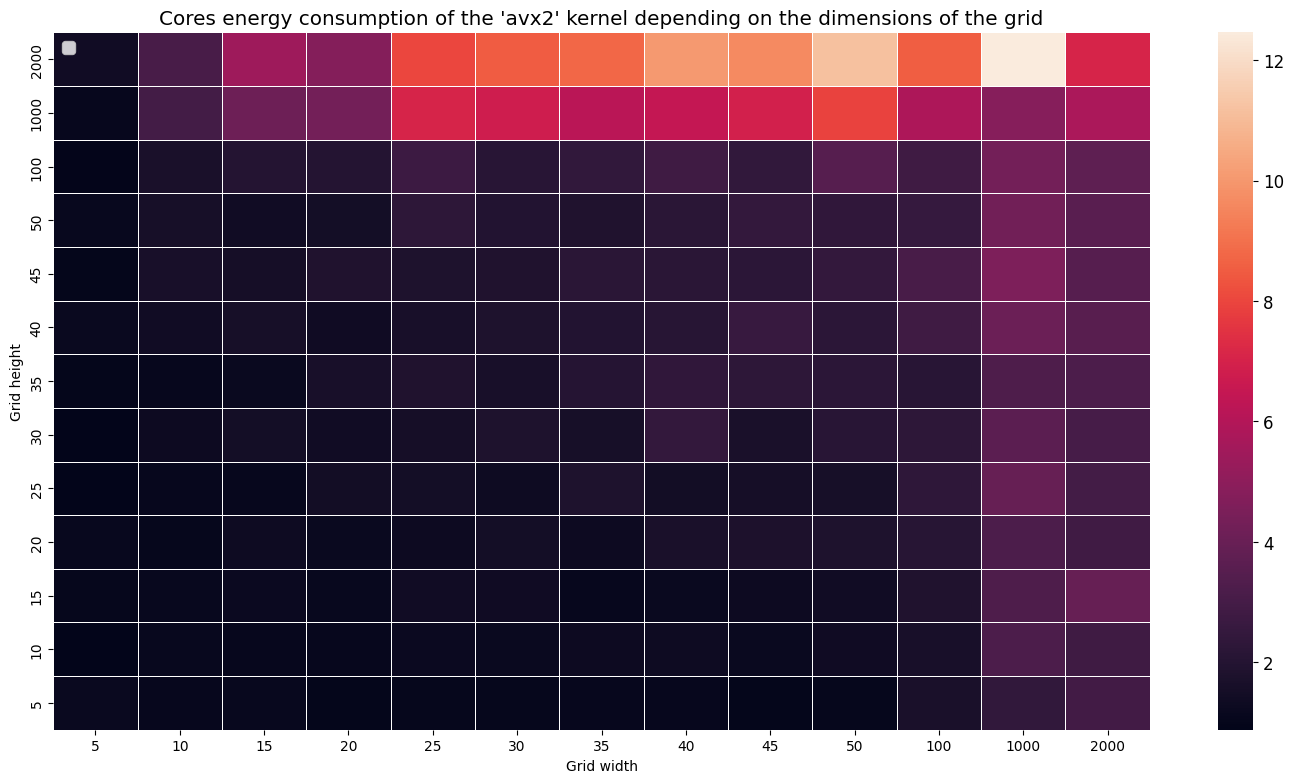

In [8]:
heatmap_cores = pd.pivot_table(df_merged_cores, values='speedup', index='mesh_height', columns=['mesh_width'])
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_cores, annot=False, linewidths=.5, ax=ax)
ax.invert_yaxis()
plt.legend(loc='upper left')
plt.title("Cores energy consumption of the 'avx2' kernel depending on the dimensions of the grid")
plt.tight_layout()
plt.xlabel('Grid width')
plt.ylabel('Grid height')
plt.savefig("../plots/stencil_avx2/avx2_energy_cores.png", format='png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


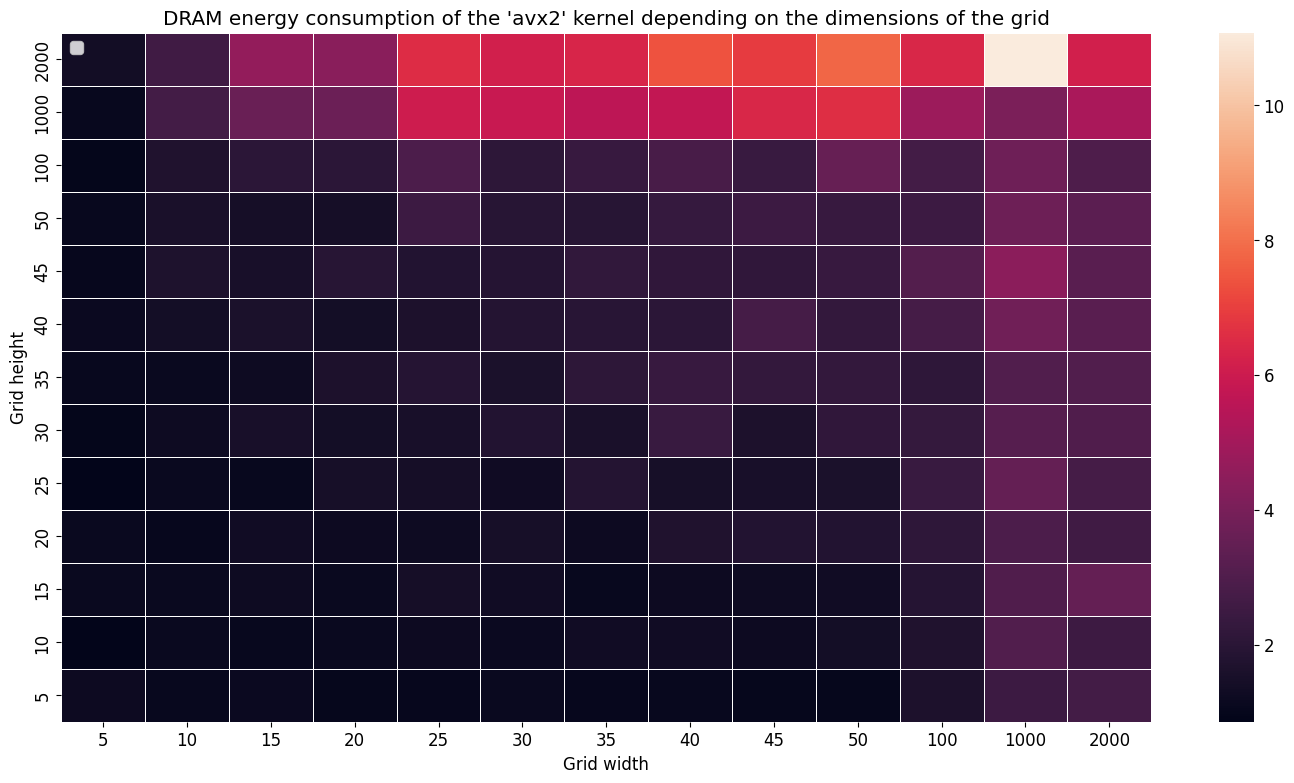

In [9]:
heatmap_dram = pd.pivot_table(df_merged_dram, values='speedup', index='mesh_height', columns=['mesh_width'])
fig, ax = plt.subplots(figsize=(14.5,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(heatmap_dram, annot=False, linewidths=.5, ax=ax)
ax.invert_yaxis()
plt.legend(loc='upper left')
plt.title("DRAM energy consumption of the 'avx2' kernel depending on the dimensions of the grid")
plt.tight_layout()
plt.xlabel('Grid width')
plt.ylabel('Grid height')
plt.savefig("../plots/stencil_avx2/avx2_energy_dram.png", format='png')
plt.show()